In [12]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats
%matplotlib inline

In [13]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')
X.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
y.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

Dataset has continuous values and also have distribution similar to normal distribution hence Gaussian Bias is better

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy :" ,accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy : 0.9722222222222222

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



Multinomial Bias is better for discrete values

In [16]:
model=MultinomialNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy :" ,accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy : 0.8888888888888888

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.86      0.86      0.86        14
           2       0.82      0.90      0.86        10

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36



In [17]:
model=LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy :" ,accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy : 0.9444444444444444

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      1.00      0.93        14
           2       1.00      0.80      0.89        10

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



/home/mantis/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
def plot_data(X_train, column):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[column], bins=30, edgecolor='black',kde=True)
    plt.subplot(1, 2, 2)
    stats.probplot(X_train[column], dist="norm", plot=plt)
    plt.show()

In [19]:
pt = PowerTransformer(method='yeo-johnson')

In [20]:
X_train[X_train.columns]=pt.fit_transform(X_train[X_train.columns])
X_test[X_test.columns]=pt.transform(X_test[X_test.columns])

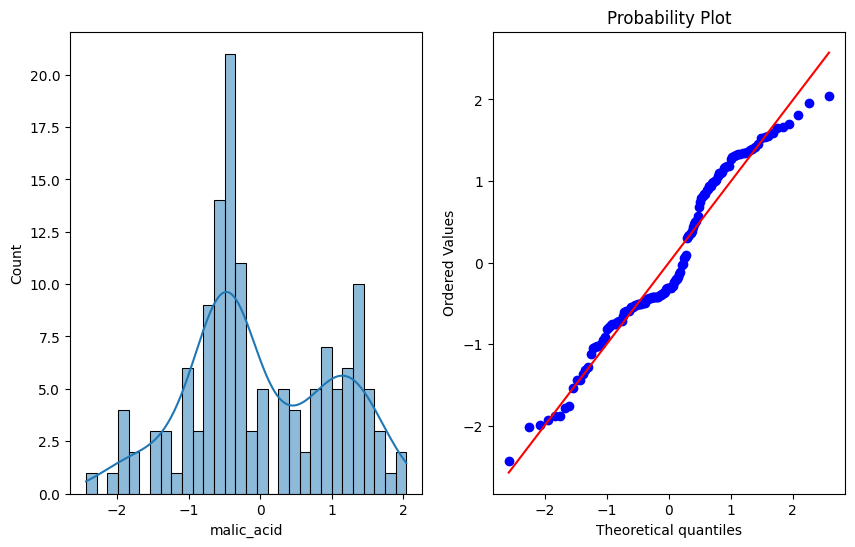

In [21]:
plot_data(X_train,'malic_acid')

Changing the distribution to a more normal distribution increases the accuracy

In [22]:
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy :" ,accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy : 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [23]:
model=LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy :" ,accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy : 0.9722222222222222

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

